## Code Python# Distributed Kaczmarz Method for Solving Linear Systems

This notebook implements a modified version of the Kaczmarz method, adapted to solve linear systems by iterating over each equation and calculating an average of intermediate values. Additionally, it incorporates relaxation and momentum parameters to enhance convergence speed and stability.

---

## Overview of the Kaczmarz Algorithm

The Kaczmarz method is an iterative algorithm for finding approximate solutions to linear systems of equations \(Ax = b\). The method is known for its effectiveness in handling large, sparse matrices and is often used in image reconstruction. This variant applies a distributed approach with added statistical analysis for convergence performance.

### Key Parameters

- **Matrix \(A\)**: Represents the coefficients of the linear system.
- **Vector \(b\)**: Represents the constants of the equations.
- **Vector \(x\)**: Initial guess for the unknowns.
- **Tolerance**: Threshold for determining convergence.
- **Max Iterations**: Limits the maximum number of iterations.
- **Relaxation (\(\alpha\))**: Controls the rate at which \(x\) updates approach the target values.
- **Momentum (\(\beta\))**: Adds stability by integrating previous iterations' changes, balancing speed and accuracy.

---
## Détails du programme

Le programme utilise une matrice `A` et un vecteur `b`, représentant le système linéaire à résoudre \(Ax = b\), ainsi qu'un vecteur `x` initialisé aléatoirement. Il applique une variation de la méthode de Kaczmarz, en itérant sur chaque ligne de `A`, pour ajuster les valeurs du vecteur solution `x`.

## Step-by-Step Code Documentation

### Import Necessary Libraries

```python
import numpy as np
import matplotlib.pyplot as plt



Code 100% moi a corriger

In [1]:
import numpy as np

# Matrix A and vector b
A = np.array([[4, 1, 2],
              [3, 5, 1],
              [1, 1, 3]])

b = np.array([4, 7, 3])

# Random initialization of vector x
x = np.random.rand(3)

# Parameters for the algorithm
tolerance = 1e-6
max_iterations = 10000
alpha = 0.9

#fait la formule de kacmarz pour rouver 1x
def KacZmarz(matrice_A, matrice_b, inconnue):
    Transpose_a = 0
    Norm = 0
    for i,A in enumerate(matrice_A):
        Transpose_a += A * inconnue[i]
        Norm += A * A

    atixi = (matrice_b - Transpose_a) / Norm
    for i,A in enumerate(matrice_A):
        inconnue[i] = inconnue[i] + atixi * A
    return inconnue

def kaxZmarz():
    all_inconnue = []
    for i in range(len(x)):
        all_inconnue.append(KacZmarz(A[i], b[i], x))
    for ligne in range(len(all_inconnue[0])):
        #for inco in range(len(inconnue_average[0])):
        print(all_inconnue[ligne])


kaxZmarz()

[0.44845675 0.67595433 0.62519631]
[0.44845675 0.67595433 0.62519631]
[0.44845675 0.67595433 0.62519631]


In [ ]:
import numpy as np

# Matrix A and vector b
A = np.array([[4, 1, 2],
              [3, 5, 1],
              [1, 1, 3]])

b = np.array([4, 7, 3])

# Random initialization of vector x
x = np.random.rand(3)
print("Initial random x:", x)

# Parameters for the algorithm
tolerance = 1e-6
max_iterations = 10000

# Pré-calcul de la norme de chaque ligne de la matrice A (évitant de recalculer à chaque itération)
norms = np.sum(A ** 2, axis=1)


# Fonction Kaczmarz pour résoudre 1x
def Kaczmarz_one_iteration(A_row, b_value, inconnue, norm):
    # Produit scalaire entre A_row et x (A_row.dot(x))
    Transpose_a = np.dot(A_row, inconnue)

    # Mise à jour de x selon l'algorithme de Kaczmarz
    atixi = (b_value - Transpose_a) / norm
    inconnue += atixi * A_row  # Mise à jour de chaque inconnue

    return inconnue


# Fonction pour exécuter une itération de Kaczmarz sur toutes les équations
def Kaczmarz_one_loop(inconnue):
    all_inconnue = np.zeros_like(inconnue)  # Initialiser une nouvelle matrice pour stocker les résultats

    # Appliquer Kaczmarz à chaque ligne de A
    # En en addtiotn tout les valeur de x,y,z dans le même tuple
    for i in range(len(A)):
        all_inconnue += Kaczmarz_one_iteration(A[i], b[i], inconnue, norms[i])

    # Retourner la moyenne des résultats avec numpy en divianst le tuple all_inconnue par le nombre de valeur
    return all_inconnue / len(A)


# Fonction principale de l'algorithme avec contrôle de convergence
def Kaczmarz():
    x_copy = x.copy()  # Initialisation des inconnues
    x_old = np.zeros_like(x_copy)  # Conserver l'ancienne version de x pour la convergence

    for iteration in range(max_iterations):
        x_old[:] = x_copy  # Conserver l'ancienne itération pour vérification de la convergence

        # Effectuer une itération complète sur toutes les équations
        x_copy = Kaczmarz_one_loop(x_copy)

        # Vérification de la convergence
        if convergence(x_copy, x_old):
            print(f"Convergence atteinte après {iteration + 1} itérations.")
            break

    return x_copy


# Fonction de convergence
def convergence(inconnue, x_old):
    # Vérification de la différence entre l'ancienne et la nouvelle valeur de x
    return np.linalg.norm(inconnue - x_old) < tolerance


# Exécution de Kaczmarz et vérification de la convergence
final_inconnue = Kaczmarz()

print("La solution finale (x, y, z) est :", final_inconnue)

# Optimize KacZmar 

he have no strategy to converge faster 

this is the version of the one i work actually to have plenty of data is i can

actually we have a probleme, somme susteme take realy long time to plot and we don t know why 

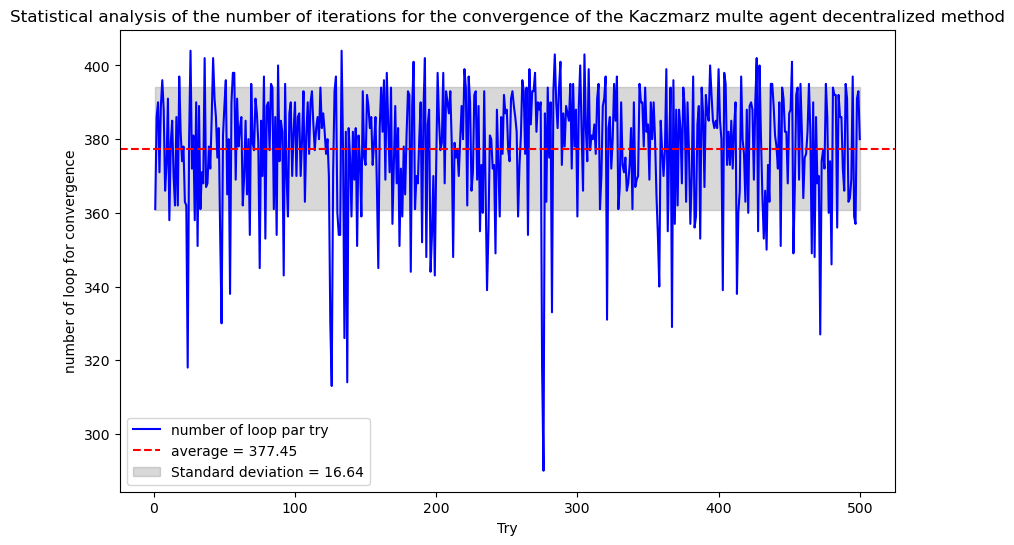

In [5]:
import numpy as np
import matplotlib.pyplot as plt


# Matrix A and vector b
A_7x7 = np.array([
    [3, 0, 2, 1, -1, 1, 0],
    [2, 3, 1, 0, 1, -1, 1],
    [0, 1, 4, 1, -1, 2, 0],
    [1, -1, 0, 3, 2, 1, -1],
    [2, 0, 1, -1, 4, 1, 1],
    [1, 1, -1, 2, 1, 3, 0],
    [0, 2, 1, -1, 0, 1, 3]
])
b = np.array([15, 11, 10, 8, 12, 13, 9])

matrix_use_b = b
matrix_use_A = A_7x7

# Parameters for the algorithm
tolerance = 1e-6
max_iterations = 10000

# Pré-calcul de la norme de chaque ligne de la matrice A
norms = np.sum(matrix_use_A ** 2, axis=1)

# Fonction Kaczmarz pour résoudre 1x
def Kaczmarz_one_iteration(A_row, b_value, inconnue, norm):
    Transpose_a = np.dot(A_row, inconnue)
    atixi = (b_value - Transpose_a) / norm
    inconnue += atixi * A_row
    return inconnue

# Fonction pour exécuter une itération de Kaczmarz sur toutes les équations
def Kaczmarz_one_loop(inconnue):
    all_inconnue = np.zeros_like(inconnue)
    for i in range(len(matrix_use_A)):
        all_inconnue += Kaczmarz_one_iteration(matrix_use_A[i], matrix_use_b[i], inconnue, norms[i])
    return all_inconnue / len(matrix_use_A)

# Fonction de convergence
def convergence(inconnue, x_old):
    return np.linalg.norm(inconnue - x_old) < tolerance

# Fonction principale de l'algorithme avec contrôle de convergence
def Kaczmarz():
    x = np.random.rand(len(b))  # Initialisation aléatoire des inconnues à chaque appel
    x_old = np.zeros_like(x)  # Conserver l'ancienne version de x pour la convergence

    for iteration in range(max_iterations):
        x_old[:] = x  # Conserver l'ancienne itération pour vérification de la convergence
        x = Kaczmarz_one_loop(x)

        if convergence(x, x_old):
            return x, iteration + 1  # Retourner la solution finale et le nombre d'itérations

    return x, max_iterations  # Si la convergence n'est pas atteinte

# Boucle pour calculer le nombre moyen d'itérations
num_repetitions = 500  # Nombre de répétitions pour calculer la moyenne
iterations_needed = []

for _ in range(num_repetitions):
    _, iterations = Kaczmarz()  # Exécute Kaczmarz et obtient le nombre d'itérations
    iterations_needed.append(iterations)

# Calcul des indicateurs statistiques
average_iterations = np.mean(iterations_needed)
std_dev_iterations = np.std(iterations_needed)

# Tracé du graphique
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_repetitions + 1), iterations_needed, label="number of loop par try", color='blue')
plt.axhline(average_iterations, color='red', linestyle='--', label=f"average = {average_iterations:.2f}")
plt.fill_between(
    range(1, num_repetitions + 1),
    average_iterations - std_dev_iterations,
    average_iterations + std_dev_iterations,
    color='gray', alpha=0.3,
    label=f"Standard deviation = {std_dev_iterations:.2f}"
)

# Ajout de titres et légendes
plt.xlabel("Try")
plt.ylabel("number of loop for convergence")
plt.title("Statistical analysis of the number of iterations for the convergence of the Kaczmarz multe agent decentralized method")
plt.legend()
plt.show()


## most advencer version


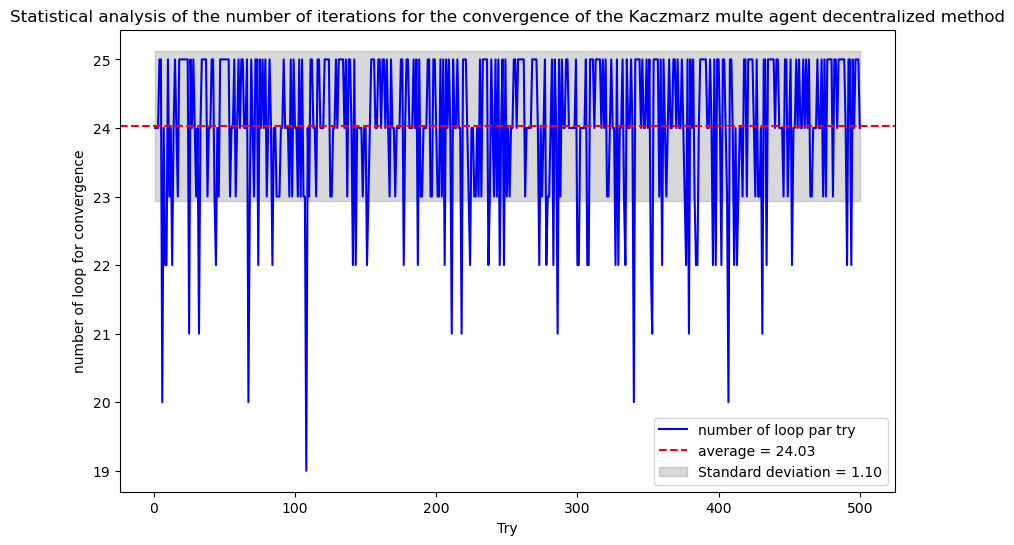

In [25]:
import numpy as np
import matplotlib.pyplot as plt

# Matrix A and vector b
A = np.array([[4, 1, 2],
              [3, 5, 1],
              [1, 1, 3]])

b = np.array([4, 7, 3])

# Parameters for the algorithm
tolerance = 1e-6
max_iterations = 10000
alpha = 0.5  # Relaxation parameter (to be adjusted as needed)
beta = 0.1  # Momentum parameter (to be adjusted as needed)

# Pré-calcul de la norme de chaque ligne de la matrice A
norms = np.sum(A ** 2, axis=1)

# Fonction Kaczmarz pour résoudre 1x
def Kaczmarz_one_iteration(A_row, b_value, inconnue, norm):
    Transpose_a = np.dot(A_row, inconnue)
    atixi = (b_value - Transpose_a) / norm
    inconnue += atixi * A_row
    return inconnue

# Fonction pour exécuter une itération de Kaczmarz sur toutes les équations
def Kaczmarz_one_loop(inconnue):
    all_inconnue = np.zeros_like(inconnue)
    for i in range(len(A)):
        all_inconnue += Kaczmarz_one_iteration(A[i], b[i], inconnue, norms[i])
    return all_inconnue / len(A)

# Fonction de convergence
def convergence(inconnue, x_old):
    return np.linalg.norm(inconnue - x_old) < tolerance

# Fonction principale de l'algorithme avec contrôle de convergence
def Kaczmarz():
    x = np.random.rand(3)  # Initialisation aléatoire des inconnues
    x_old = np.zeros_like(x)  # Conserver l'ancienne version de x pour la convergence
    momentum = np.zeros_like(x)  # Pour ajouter le momentum

    for iteration in range(max_iterations):
        x_old[:] = x  # Conserver l'ancienne itération pour vérification de la convergence
        update = Kaczmarz_one_loop(x)
        
        # Ajout de relaxation et de momentum dans la mise à jour de x
        new_x = (1 - alpha) * x + alpha * update
        x = new_x + beta * momentum  # Applique le momentum
        
        # Met à jour le momentum
        momentum = x - x_old
        
        if convergence(x, x_old):
            return x, iteration + 1  # Retourner la solution finale et le nombre d'itérations

    return x, max_iterations  # Si la convergence n'est pas atteinte

# Boucle pour calculer le nombre moyen d'itérations
num_repetitions = 500  # Nombre de répétitions pour calculer la moyenne
iterations_needed = []

for _ in range(num_repetitions):
    _, iterations = Kaczmarz()  # Exécute Kaczmarz et obtient le nombre d'itérations
    iterations_needed.append(iterations)

# Calcul des indicateurs statistiques
average_iterations = np.mean(iterations_needed)
std_dev_iterations = np.std(iterations_needed)

# Tracé du graphique
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_repetitions + 1), iterations_needed, label="number of loop par try", color='blue')
plt.axhline(average_iterations, color='red', linestyle='--', label=f"average = {average_iterations:.2f}")
plt.fill_between(
    range(1, num_repetitions + 1),
    average_iterations - std_dev_iterations,
    average_iterations + std_dev_iterations,
    color='gray', alpha=0.3,
    label=f"Standard deviation = {std_dev_iterations:.2f}"
)

# Ajout de titres et légendes
plt.xlabel("Try")
plt.ylabel("number of loop for convergence")
plt.title("Statistical analysis of the number of iterations for the convergence of the Kaczmarz multe agent decentralized method")
plt.legend()
plt.show()


In [ ]:
import numpy as np
import json
import os
import matplotlib.pyplot as plt
import time

# Paramètres pour le dossier de sortie
output_folder = "graphs"
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Paramètres de l'algorithme
tolerance = 1e-6
max_iterations = 1_000_000
num_repetitions = 500  # Nombre de répétitions pour calculer la moyenne des itérations



# Fonction Kaczmarz pour une itération unique
def Kaczmarz_one_iteration(A_row, b_value, inconnue, norm):
    atixi = (b_value - np.dot(A_row, inconnue)) / norm
    inconnue += atixi * A_row
    return inconnue


# Fonction pour exécuter une boucle d'itérations de Kaczmarz sur toutes les équations
def Kaczmarz_one_loop(A, b, inconnue, norms):
    for i in range(len(A)):
        inconnue = Kaczmarz_one_iteration(A[i], b[i], inconnue, norms[i])
    return inconnue


#Convergence controle
#def convergence(inconnue, x_old):
#    return np.linalg.norm(inconnue - x_old) < tolerance

def convergence(A, b, inconnue):
    residu = np.linalg.norm(A @ inconnue - b)
    b_norm = np.linalg.norm(b)
    return residu / b_norm < tolerance



# Algorithme de Kaczmarz avec comptage des itérations
def Kaczmarz(A, b):
    norms = np.sum(A ** 2, axis=1)  # Pré-calcul des normes
    x = np.random.rand(len(b))  # Initialisation aléatoire
    x_old = np.zeros_like(x)

    for iteration in range(max_iterations):
        x_old[:] = x
        x = Kaczmarz_one_loop(A, b, x, norms)

        if convergence(A, b, x):
            return x, iteration + 1

    return x, max_iterations

condition_numbers = []
execution_times = []

# Lire les systèmes de `systems_data_3x3.json`
with open("../../ressource/System_of_linear_equations/systems_data_30x30.json", "r") as f:
    systems_data = json.load(f)

for idx, system in enumerate(systems_data):
    A = np.array(system["A"])
    b = np.array(system["b"])

    # Calcul du nombre de condition de A
    eigenvalues = np.linalg.eigvals(A)
    lambda_max = np.max(np.abs(eigenvalues))
    lambda_min = np.min(np.abs(eigenvalues))
    condition_number = lambda_max / lambda_min

    # Mesurer le temps d'exécution de l'algorithme
    start_time = time.time()
    solution, iterations = Kaczmarz(A, b)
    end_time = time.time()

    execution_time = end_time - start_time

    # Stocker les résultats
    condition_numbers.append(condition_number)
    execution_times.append(execution_time)

    # Affichage des résultats
    print(f"Système {idx + 1}:")
    print(f"Solution: {solution}")
    print(f"Nombre d'itérations: {iterations}")
    print(f"Nombre de condition κ(A): {condition_number:.2f}\n")

plt.figure(figsize=(10, 6))
plt.scatter(condition_numbers, execution_times, color="blue", alpha=0.7)
plt.xlabel("Number of conditions κ(A)")
plt.ylabel("Execution time (seconds)")
plt.title("Relationship between the number of conditions κ(A) and the execution time Matrix 30x30 (new condition)")
plt.grid()
plt.show()

Partie test pour faire un avergae de plusieur unknow

In [ ]:
# Liste initiale

tab = [[1, 3, 4], [6, 4, 3], [7, 1, 9]]

# Initialisation de la liste de sommes
num_lists = len(tab)  # Nombre de sous-listes
num_elements = len(tab[0])  # Nombre d'éléments dans chaque sous-liste

# On initialise une liste de zéros pour stocker les sommes
sums = [0] * num_elements

for row in tab:
    for i,value in enumerate(row):
        sums[i] += value

solution = [s / num_lists for s in sums]

print(solution)